In [1]:
# DSC680
# Weeks 9-12
# Term Project 3
# Author: Nathanael Ochoa
# 03/01/25

# Term Project 3

In [2]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
# Import data
data = pd.read_csv('680Project3/wdbc.data.csv')

In [4]:
# Preview dataset
data.head(5)

,id,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Preparation

In [5]:
# Check for null values
data.isnull().sum()

id                    0
diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [6]:
# Drop 'id' column since it's not needed
data.drop('id', axis = 1, inplace = True)

M stands for malignant and B stands for Benign so I will create a target boolean colummn where M is 1 and B is 0:

In [7]:
# Map values
data['d_bool'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Convert to binary
data['d_bool'] = data['d_bool'].astype(bool)

In [8]:
# Check unique values
data['d_bool'].unique()

array([ True, False])

In [9]:
# Check data types
data.dtypes

diagnosis              object
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
d_bool                   bool
dtype: object

## Exploratory Data Analysis (EDA)

View target variable (d_bool) distribution.

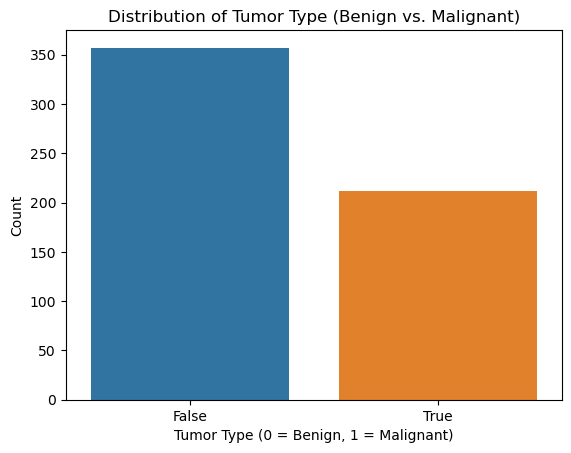

In [10]:
# Count plot to show distribution of the target variable
sns.countplot(x = 'd_bool', data = data)

# Title and labels
plt.title('Distribution of Tumor Type (Benign vs. Malignant)')
plt.xlabel('Tumor Type (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')

# Save the plot as an image
plt.savefig('p3-distribution.png', dpi = 300)

# Show plot
plt.show()

Univariate analysis of features.

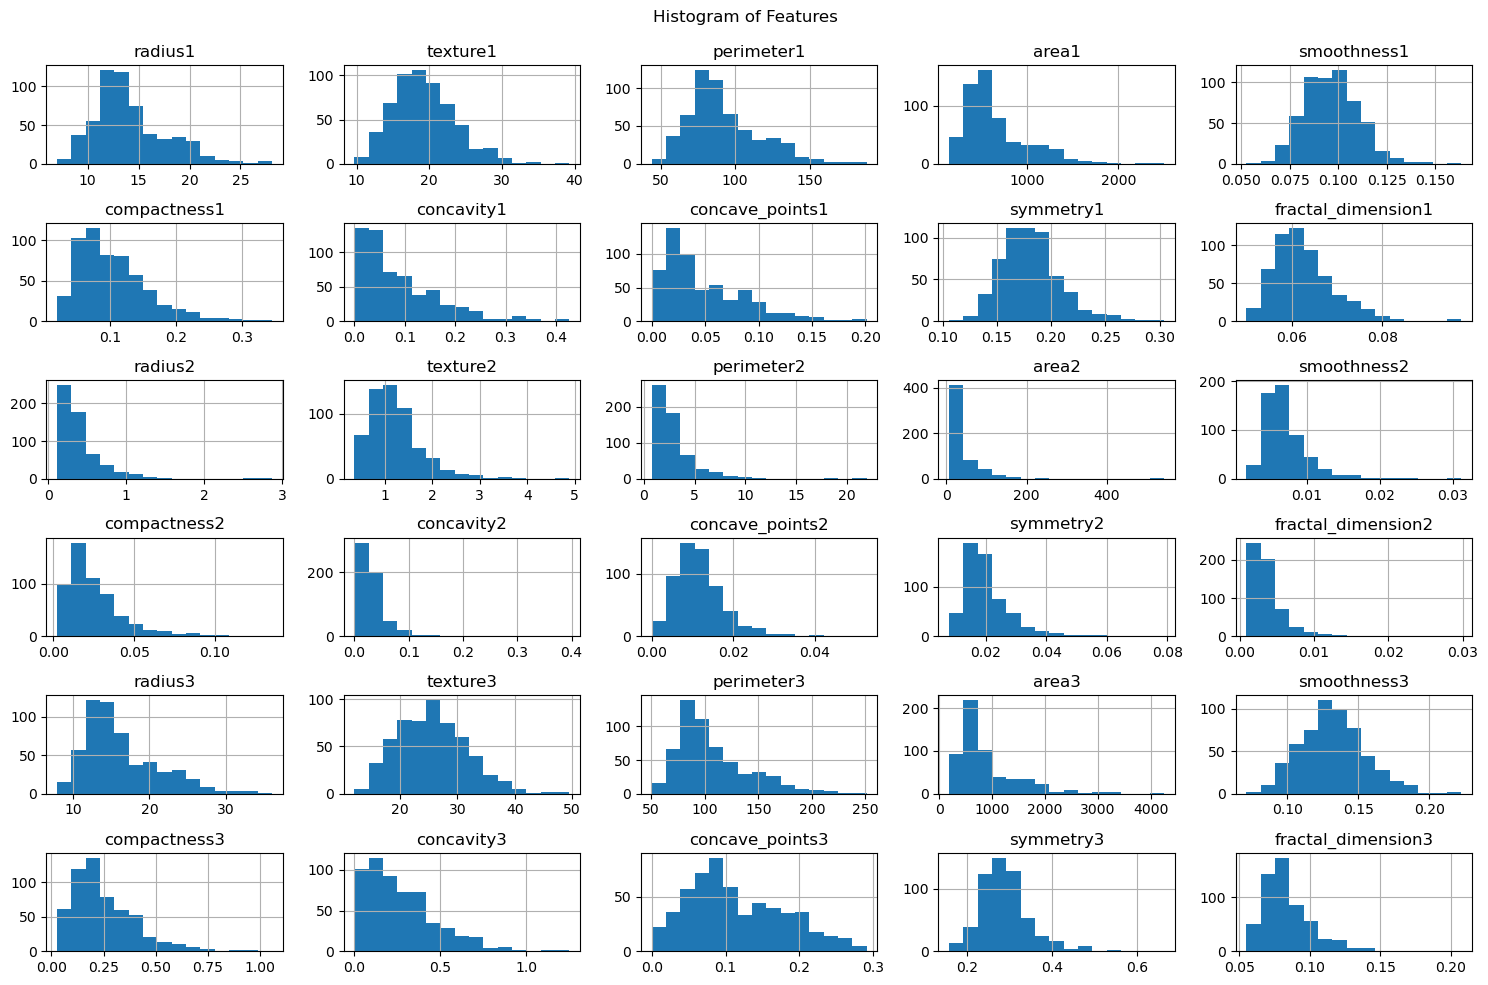

In [12]:
# Histograms for the first few features
data.drop(columns = ['d_bool']).hist(bins = 15, figsize = (15, 10))

# Adjust layout to prevent overlap
plt.tight_layout(rect = [0, 0, 1, 0.96])

# Add a title
plt.suptitle('Histogram of Features')

# Save the plot as an image
plt.savefig('p3-histograms.png', dpi = 300)

# Show plot
plt.show()

There is a decent distribution, but overall, the values tend to be on the smaller end, which makes sense considering the scale of nucleus measurements.

View the distribution using box plots. I chose the radius, perimeter, and area variables because they specifically relate to size.

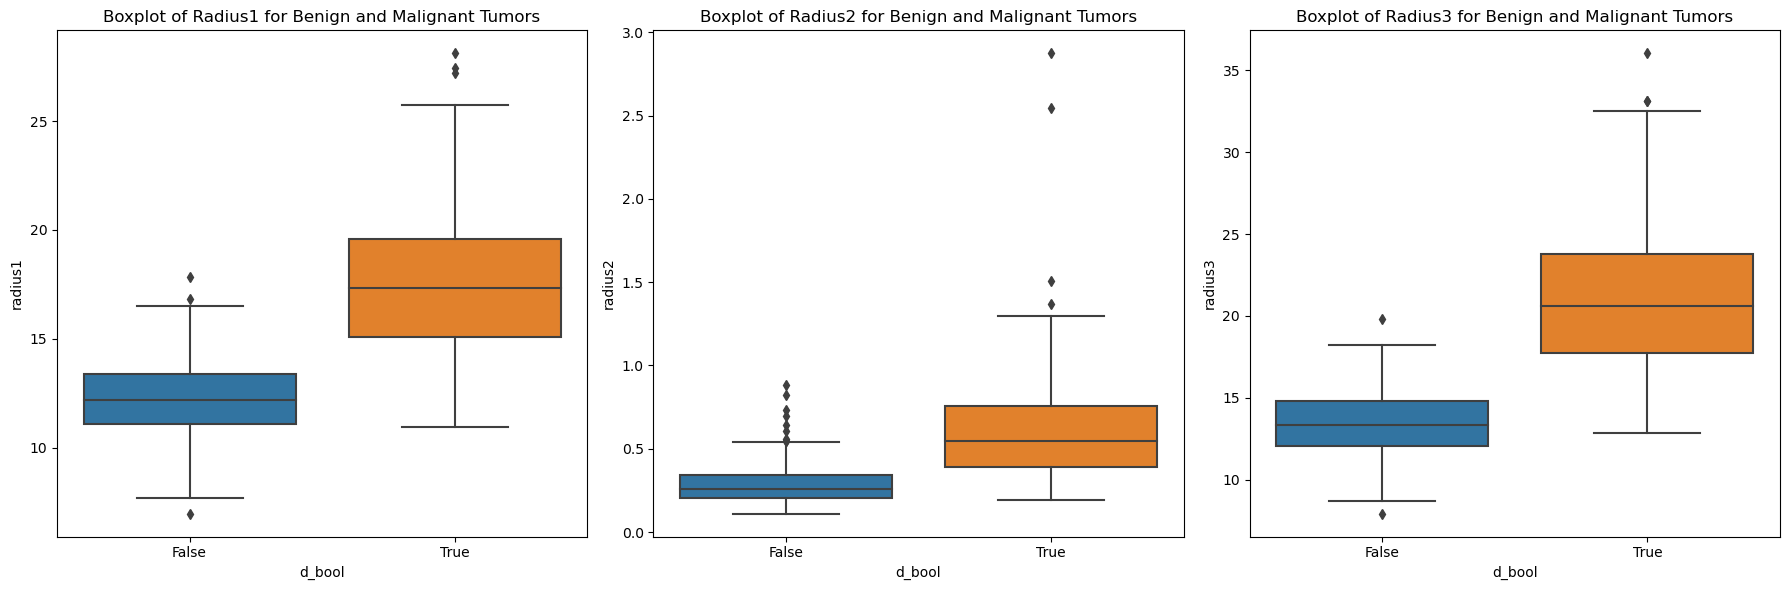

In [13]:
# Create a single row with three subplots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))  # 1 row, 3 columns

# Plot Boxplot for 'radius1'
sns.boxplot(x = 'd_bool', y = 'radius1', data = data, ax = axes[0])
axes[0].set_title('Boxplot of Radius1 for Benign and Malignant Tumors')

# Plot Boxplot for 'radius2'
sns.boxplot(x = 'd_bool', y = 'radius2', data = data, ax = axes[1])
axes[1].set_title('Boxplot of Radius2 for Benign and Malignant Tumors')

# Plot Boxplot for 'radius3'
sns.boxplot(x = 'd_bool', y = 'radius3', data = data, ax = axes[2])
axes[2].set_title('Boxplot of Radius3 for Benign and Malignant Tumors')

# Adjust layout to make sure titles and labels don't overlap
plt.tight_layout()

# Save the plot as an image
plt.savefig('p3-radius.png', dpi = 300)

# Show the plot
plt.show()

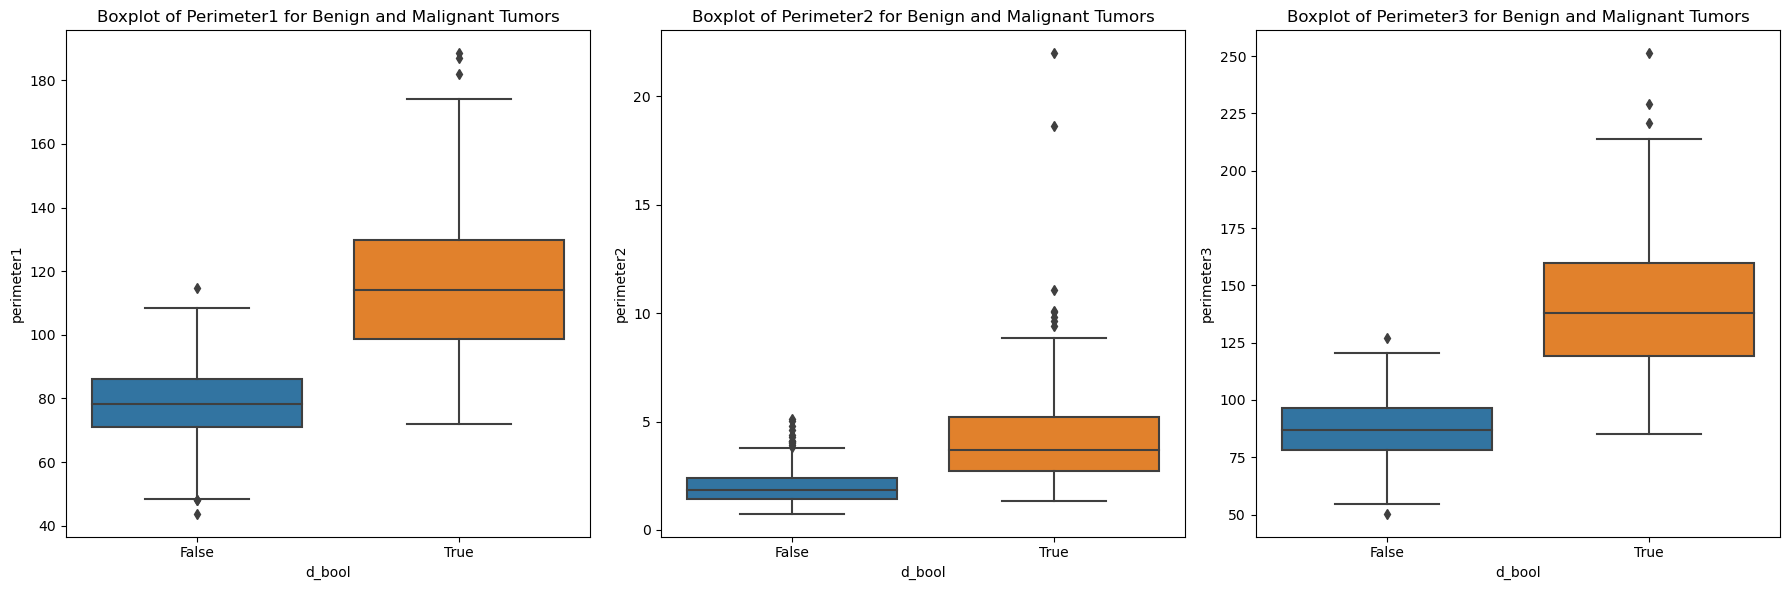

In [14]:
# Single row with three subplots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# Plot Boxplot for 'perimeter1'
sns.boxplot(x = 'd_bool', y = 'perimeter1', data = data, ax = axes[0])
axes[0].set_title('Boxplot of Perimeter1 for Benign and Malignant Tumors')

# Plot Boxplot for 'perimeter2'
sns.boxplot(x = 'd_bool', y = 'perimeter2', data = data, ax = axes[1])
axes[1].set_title('Boxplot of Perimeter2 for Benign and Malignant Tumors')

# Plot Boxplot for 'perimeter3'
sns.boxplot(x = 'd_bool', y = 'perimeter3', data = data, ax = axes[2])
axes[2].set_title('Boxplot of Perimeter3 for Benign and Malignant Tumors')

# Adjust layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('p3-perimeter.png', dpi = 300)

# Show the plot
plt.show()

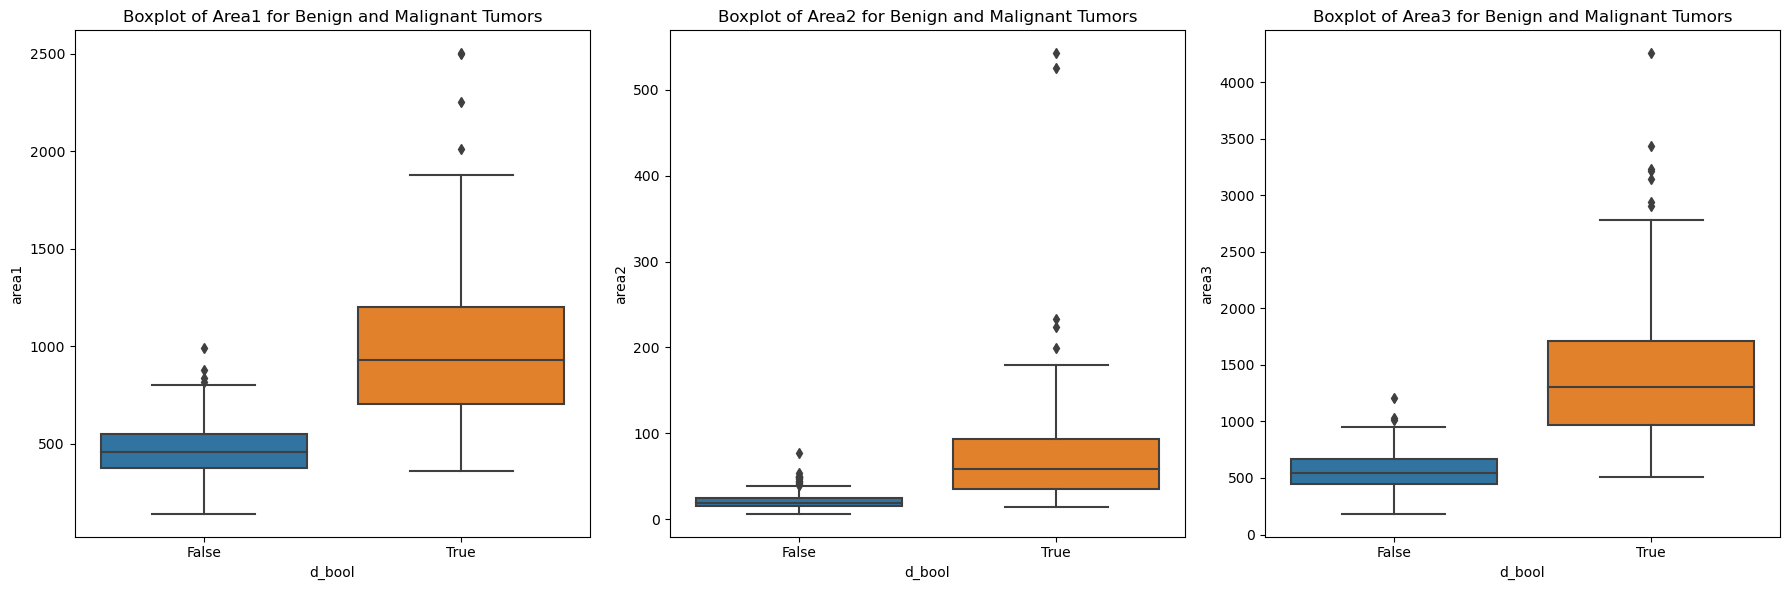

In [15]:
# Single row with three subplots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# Plot Boxplot for 'area1'
sns.boxplot(x = 'd_bool', y = 'area1', data = data, ax = axes[0])
axes[0].set_title('Boxplot of Area1 for Benign and Malignant Tumors')

# Plot Boxplot for 'area2'
sns.boxplot(x = 'd_bool', y = 'area2', data = data, ax = axes[1])
axes[1].set_title('Boxplot of Area2 for Benign and Malignant Tumors')

# Plot Boxplot for 'area3'
sns.boxplot(x = 'd_bool', y = 'area3', data = data, ax = axes[2])
axes[2].set_title('Boxplot of Area3 for Benign and Malignant Tumors')

# Adjust layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('p3-area.png', dpi = 300)

# Show the plot
plt.show()

The box plots show that, while there is some overlap, malignant diagnoses tend to have larger values in the radius, perimeter, and area variables.

Analyze the correlations between the variables and the target variable (d_bool).

In [16]:
# Calculate the correlation matrix
corr_matrix = data.drop(columns = ['diagnosis']).corr()

# Extract the correlation with the target column 'd_bool'
target_corr = corr_matrix['d_bool'].sort_values(ascending = False)

# Print the correlations between variables and the target
print(target_corr)

d_bool                1.000000
concave_points3       0.793566
perimeter3            0.782914
concave_points1       0.776614
radius3               0.776454
perimeter1            0.742636
area3                 0.733825
radius1               0.730029
area1                 0.708984
concavity1            0.696360
concavity3            0.659610
compactness1          0.596534
compactness3          0.590998
radius2               0.567134
perimeter2            0.556141
area2                 0.548236
texture3              0.456903
smoothness3           0.421465
symmetry3             0.416294
texture1              0.415185
concave_points2       0.408042
smoothness1           0.358560
symmetry1             0.330499
fractal_dimension3    0.323872
compactness2          0.292999
concavity2            0.253730
fractal_dimension2    0.077972
symmetry2            -0.006522
texture2             -0.008303
fractal_dimension1   -0.012838
smoothness2          -0.067016
Name: d_bool, dtype: float64


The correlation values indicate the strength and direction of the relationships between various features and the target variable, 'd_bool' (which is the binary classification target for benign or malignant tumors). The features most strongly correlated with 'd_bool' are 'concave_points3' (0.79), 'perimeter3' (0.78), and 'concave_points1' (0.78), followed by 'radius3' (0.78) and 'perimeter1' (0.74). These correlations suggest that features related to the shape and size of the tumor's cell nuclei, such as concave points, perimeter, and radius, are highly predictive of tumor classification. Other significant positive correlations include 'area3' (0.73) and 'area1' (0.71), reinforcing the importance of size-related variables in distinguishing between tumor types. On the other hand, correlations with features like 'fractal_dimension2' (0.08) and 'symmetry2' (-0.01) are very weak, indicating these aspects of the cell nuclei's complexity and symmetry have minimal impact on the target. Most features related to texture and smoothness show moderate correlations, with a few, like 'texture3' (0.46) and 'smoothness3' (0.42), being slightly more influential, though they are less important compared to the shape and size characteristics of the nuclei.

## Model Building Phase

First, I'll try an 80-20 split while also applying feature scaling.

In [17]:
# Features and target variable
X = data.drop(columns = ['diagnosis', 'd_bool'])
y = data['d_bool']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 25)

Model 1: Logistic Regression

In [18]:
# Instantiate and train the model
logreg = LogisticRegression(random_state = 25)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Calculate accuracy percentage
accuracy_logreg = accuracy_score(y_test, y_pred_logreg) * 100

# View accuracy
print(f"Logistic Regression Accuracy (80-20): {accuracy_logreg:.2f}%\n")

Logistic Regression Accuracy (80-20): 96.49%



Model 2: Random Forest Classifier

In [19]:
# Instantiate and train the model
rf = RandomForestClassifier(n_estimators = 100, random_state = 25)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Calculate accuracy percentage
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100

# View Accuracy
print(f"Random Forest Accuracy (80-20): {accuracy_rf:.2f}%\n")

Random Forest Accuracy (80-20): 93.86%



Model 3: Support Vector Machine

In [20]:
# Instantiate and train the model
svm = SVC(random_state = 25)
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Calculate accuracy percentage
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100

# View accuracy
print(f"SVM Accuracy (80-20): {accuracy_svm:.2f}%\n")

SVM Accuracy (80-20): 96.49%



Now, I'll use a 70-30 split while still applying feature scaling.

In [21]:
# Train-test split AGAIN (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 25)

Model 4: Logistic Regression (70-30)

In [22]:
# Instantiate and train the model
logreg = LogisticRegression(random_state = 25)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Calculate accuracy percentage
accuracy_logreg = accuracy_score(y_test, y_pred_logreg) * 100

# View accuracy
print(f"Logistic Regression Accuracy (80-20): {accuracy_logreg:.2f}%\n")

Logistic Regression Accuracy (80-20): 97.66%



Model 5: Random Forest Classifier (70-30)

In [23]:
# Instantiate and train the model
rf = RandomForestClassifier(n_estimators = 100, random_state = 25)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Calculate accuracy percentage
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100

# View accuracy
print(f"Random Forest Accuracy (80-20): {accuracy_rf:.2f}%\n")

Random Forest Accuracy (80-20): 95.91%



Model 6: Support Vector Machine (70-30)

In [24]:
# Instantiate and train the model
svm = SVC(random_state = 25)
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Calculate accuracy percentage
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100

# View accuracy
print(f"SVM Accuracy (80-20): {accuracy_svm:.2f}%\n")

SVM Accuracy (80-20): 97.08%



The logistic regression model using a 70-30 split yielded the highest accuracy, 97.66%. I'd like to try and increase the accuracy if possible.

In [25]:
# Logistic Regression with 5-fold cross-validation
logreg = LogisticRegression(random_state = 25)
cv_scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring = 'accuracy')

# Output average accuracy across all folds
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

Logistic Regression Cross-Validation Accuracy: 97.74%


A combination of feature scaling, a 70-30 split, logistic regression, and cross-validation resulted in a highly accurate model with an accuracy of 97.74%.

Now let's view the feature importance (coefficients) from model 4:

In [27]:
# Extract coefficients (feature importance)
coefficients = logreg.coef_[0]

# Create a DataFrame to display the features and their importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
})

# Sort the features by importance (absolute value of the coefficients)
feature_importance['Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)

# Display the feature importance
print("\nFeature Importance based on Logistic Regression Coefficients:")
print(feature_importance)


Feature Importance based on Logistic Regression Coefficients:
               Feature  Importance
21            texture3    1.467985
20             radius3    1.310722
23               area3    1.157733
22          perimeter3    1.017319
26          concavity3    0.940342
27     concave_points3    0.939062
6           concavity1    0.936243
7      concave_points1    0.872500
10             radius2    0.823550
13               area2    0.754876
19  fractal_dimension2    0.723933
28           symmetry3    0.679973
15        compactness2    0.630529
24         smoothness3    0.607188
3                area1    0.485825
11            texture2    0.452249
0              radius1    0.443119
14         smoothness2    0.400092
2           perimeter1    0.400065
16          concavity2    0.349060
18           symmetry2    0.281401
8            symmetry1    0.209423
12          perimeter2    0.203850
29  fractal_dimension3    0.194081
5         compactness1    0.191846
9   fractal_dimension1    0

Given that the features represent measurements of the cell nuclei from breast tumor samples, the feature importance based on the logistic regression coefficients provides insight into which characteristics (specifically related to the size, shape, and texture of the nuclei) are most influential in distinguishing between benign and malignant tumors. The most significant features include 'texture3' (1.47), 'radius3' (1.31), and 'area3' (1.16), which reflect key characteristics of the nuclei's texture, size, and perimeter. These findings suggest that the cell nuclei's overall size and surface texture (as measured by 'radius', 'area', and 'perimeter') are the primary factors driving the classification. Additionally, features such as 'concavity3' (0.94) and 'concave_points3' (0.94), which measure the indentation or irregularity in the cell nuclei, also play an important role, highlighting the importance of the cell nuclei's shape in classification. On the other hand, features like 'compactness3' (0.01) and 'smoothness1' (0.13) have minimal influence, suggesting that certain aspects of the cell nuclei, like their smoothness and compactness, are less important for differentiating between tumor types in this dataset. Overall, the model emphasizes size and shape characteristics, with less weight on smoothness and texture properties.